In [1]:
import pandas as pd

targetStart = 0
targetEnd = 7

dirPath = '/superbugai-data/yash/chapter_1/workspace/EHRQC/data/icd_cohort_test/'
dataDf = pd.read_csv(dirPath + 'data_matrix.csv')

dataDf.anchor_time = dataDf.anchor_time.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))
dataDf.death_datetime = dataDf.death_datetime.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))

dataDf['target'] = (dataDf['death_datetime'] > (dataDf['anchor_time'] + pd.Timedelta(days=targetStart))) & (dataDf['death_datetime'] < (dataDf['anchor_time'] + pd.Timedelta(days=targetEnd)))
dataDf.target.fillna(value=False, inplace=True)


dropCols = [
    'person_id',
    'age',
    'gender',
    'ethnicity_WHITE',
    'ethnicity_BLACK',
    'ethnicity_UNKNOWN',
    'ethnicity_OTHER',
    'ethnicity_HISPANIC',
    'ethnicity_ASIAN',
    'ethnicity_UNABLE_TO_OBTAIN',
    'ethnicity_AMERICAN_INDIAN',
    'anchor_time',
    'death_datetime',
    'target',
]

vitalsCols = ['heartrate', 'sysbp', 'diabp', 'meanbp', 'resprate', 'tempc', 'spo2', 'gcseye', 'gcsverbal', 'gcsmotor']
labsCols = ['chloride_serum', 'creatinine', 'sodium_serum', 'hemoglobin', 'platelet_count', 'urea_nitrogen', 'glucose_serum', 'bicarbonate', 'potassium_serum', 'anion_gap', 'leukocytes_blood_manual', 'hematocrit']

X = dataDf.drop(dropCols, axis = 1)

y = dataDf["target"]

In [2]:
y.value_counts()

target
False    2514
True      437
Name: count, dtype: int64

In [3]:
def buildMLPModel(X, y, layerSize):

    from sklearn.neural_network import MLPClassifier

    mlp = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes = (layerSize, layerSize), learning_rate_init=0.00001)
    mlp.fit(X, y)

    from sklearn.model_selection import cross_validate

    mlpScores = cross_validate(mlp, X, y, cv=5, scoring=['accuracy', 'balanced_accuracy', 'average_precision', 'f1', 'roc_auc'])
    # mlpScores['test_mccf1_score'] = cross_validate(mlp, X, y, cv=5, scoring = make_scorer(calculateMccF1, greater_is_better=True))['test_score']
    return mlpScores


In [4]:
X.iloc[:, 80:90]

,potassium_serum_max,anion_gap_max,leukocytes_blood_manual_max,hematocrit_max,chloride_serum_avg,creatinine_avg,sodium_serum_avg,hemoglobin_avg,platelet_count_avg,urea_nitrogen_avg
0,-1.032513,-0.678093,-0.021259,-0.472858,-0.007083,-0.012787,-0.012926,-0.013854,0.405787,-0.921470
1,0.285747,0.082170,-0.010688,0.446159,-0.008696,-0.012383,-0.001477,-0.013210,0.343875,-0.427899
2,-0.373383,-0.831807,0.035511,1.047937,-0.031119,-0.012699,-0.036804,-0.011740,0.351605,-0.562265
3,0.615312,-0.605390,-0.001853,-0.050755,-0.013939,-0.012971,-0.005157,-0.013735,1.225756,-0.878818
4,-0.702948,1.073005,-0.015500,0.143288,-0.005470,-0.011875,-0.016197,-0.013785,-0.063600,0.362122
...,...,...,...,...,...,...,...,...,...,...
2946,-0.702948,-0.393514,0.000146,-0.297642,-0.015955,-0.012491,-0.023556,-0.014199,-0.735650,-0.707966
2947,-0.263528,0.021931,0.047161,-1.073812,-0.017031,-0.010571,-0.030371,-0.013607,0.125970,0.706917
2948,1.604007,1.683708,-0.045485,1.040011,-0.026148,-0.009795,-0.053664,-0.012925,-0.681798,2.135206
2949,1.164587,0.645097,0.008443,1.320753,-0.009825,-0.010595,-0.006384,-0.011776,-1.018369,2.220513


In [5]:
mlpScores = buildMLPModel(X, y, 150)
mlpScores

/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Ma

{'fit_time': array([39.46194911, 39.73794484, 40.91249561, 40.09673738, 39.04583216]),
 'score_time': array([0.01528883, 0.01414251, 0.01390457, 0.01400828, 0.01344228]),
 'test_accuracy': array([0.90186125, 0.91355932, 0.91186441, 0.92372881, 0.92881356]),
 'test_balanced_accuracy': array([0.74077128, 0.782946  , 0.77719888, 0.79366331, 0.81759326]),
 'test_average_precision': array([0.71278652, 0.72105932, 0.68754659, 0.7649783 , 0.78750137]),
 'test_f1': array([0.60810811, 0.67096774, 0.66233766, 0.70198675, 0.73417722]),
 'test_roc_auc': array([0.87052684, 0.87710518, 0.88722835, 0.9076118 , 0.89084571])}

## Spider chart example

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Set data
df = pd.DataFrame({
    'group': ['A','B','C','D'],
    'var1': [38, 1.5, 30, 4],
    'var2': [29, 10, 9, 34],
    'var3': [8, 39, 23, 24],
    'var4': [7, 31, 33, 14],
    'var5': [28, 15, 32, 14]
})


In [5]:
categories=list(df)[1:]
N = len(categories)
N

5

In [6]:
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

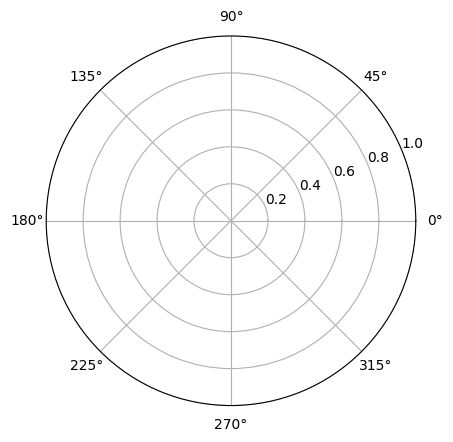

In [8]:
# Initialise the spider plot
ax = plt.subplot(111, polar=True)

In [9]:
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

([<matplotlib.axis.XTick at 0x7fc434f6e040>,
 [Text(0.0, 0, 'var1'),
  Text(1.2566370614359172, 0, 'var2'),
  Text(2.5132741228718345, 0, 'var3'),
  Text(3.7699111843077517, 0, 'var4'),
  Text(5.026548245743669, 0, 'var5')])

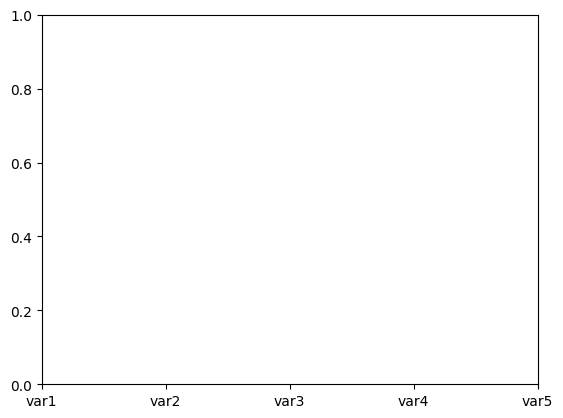

In [10]:
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

(0.0, 40.0)

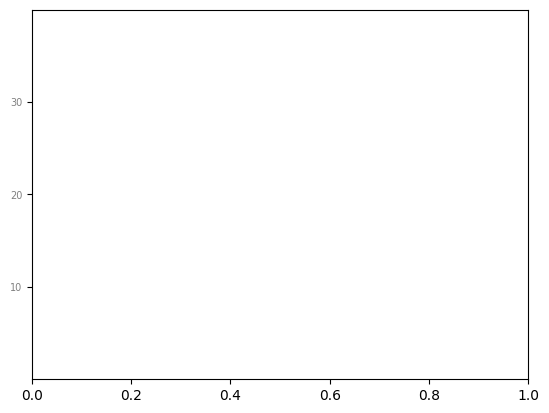

In [11]:
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)

In [12]:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)

In [13]:
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


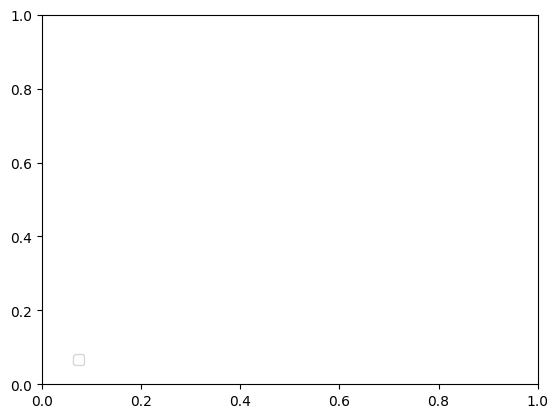

In [14]:
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [15]:
plt.show()

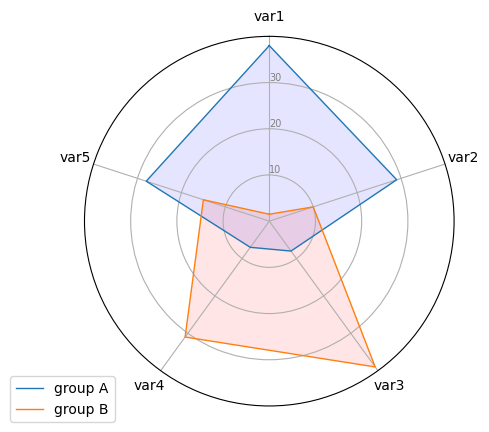

In [16]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [17]:
dataDirName = '/home/yram0006/phd/chapter_2/workspace/mortality_data/standardisation_experiment/'

In [41]:
def getLists(d):
    labels = []
    accuracy_scores = []
    balanced_accuracy_scores = []
    average_precision_scores = []
    f1_scores = []
    roc_auc_scores = []
    mccf1_scores = []

    for label, scores in d.items():
        labels.append(label)
        for key, value in scores.items():
            if key == 'test_accuracy':
                accuracy_scores.append(value)
            if key == 'test_balanced_accuracy':
                balanced_accuracy_scores.append(value)
            if key == 'test_average_precision':
                average_precision_scores.append(value)
            if key == 'test_f1':
                f1_scores.append(value)
            if key == 'test_roc_auc':
                roc_auc_scores.append(value)
            if key == 'test_mccf1_score':
                mccf1_scores.append(value)
    return labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores, mccf1_scores

In [48]:
import pickle
from pathlib import Path

scoresFile = dataDirName + 'standardised_icd_vb_0_va_72_lb_0_la_72/cv_scores_ts_0_te_7.pickle'

scoresDict = {}

with open(Path(scoresFile), 'rb') as fp:
    scoresDict = pickle.load(fp)

labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores, mccf1_scores = getLists(scoresDict)

In [49]:
dataDict = {
    'group': [],
    'accuracy': [],
    'balanced_accuracy': [],
    'average_precision': [],
    'f1': [],
    'roc_auc': [],
    'mccf1_score': []
}

for i in range(len(labels)):
    dataDict['group'].append(labels[i])
    dataDict['accuracy'].append(accuracy_scores[i].mean())
    dataDict['balanced_accuracy'].append(balanced_accuracy_scores[i].mean())
    dataDict['average_precision'].append(average_precision_scores[i].mean())
    dataDict['f1'].append(f1_scores[i].mean())
    dataDict['roc_auc'].append(roc_auc_scores[i].mean())
    dataDict['mccf1_score'].append(mccf1_scores[i].mean())
    

In [50]:
dataDict

{'group': ['xgb',
  'lr',
  'lgbm',
  'mlp',
  'xgb_min',
  'lr_min',
  'lgbm_min',
  'mlp_min',
  'xgb_ensemble',
  'lr_ensemble'],
 'accuracy': [0.9256186515010045,
  0.9273015873015874,
  0.92864782276547,
  0.9044110573522339,
  0.8983521489403842,
  0.920232011996718,
  0.9198964434258553,
  0.892967772967773,
  0.8829164124466138,
  0.9226176756378098],
 'balanced_accuracy': [0.7640032448530637,
  0.7929742973076008,
  0.7750930353172103,
  0.7673923233798708,
  0.666798191421487,
  0.7645446663620931,
  0.756026102610261,
  0.7541106642418027,
  0.6118269653052262,
  0.7811757324800803],
 'average_precision': [0.7738314424783137,
  0.7667838730036582,
  0.7994282542535218,
  0.6905544050163236,
  0.7654491499132233,
  0.7483462566878725,
  0.7366502056666209,
  0.6559736456742458,
  0.761580048304993,
  0.7846780132844715],
 'f1': [0.6790615455349156,
  0.710390624031177,
  0.6951575327335965,
  0.6396372272065945,
  0.49553334471045873,
  0.6690587420454743,
  0.657717203157824

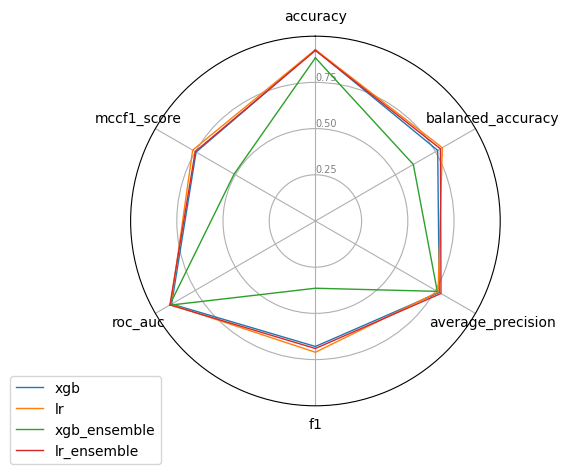

In [51]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame(dataDict)
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75], ["0.25","0.50","0.75"], color="grey", size=7)
plt.ylim(0,1)


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

for i in [0, 1, 8, 9]:
    # Ind1
    values=df.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=labels[i])
    # ax.fill(angles, values, 'b', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()